In [1]:
import numpy as np
import torch   
import gzip
import requests
import os

In [2]:
os.listdir('.')

['torchinhos.ipynb', '.ipynb_checkpoints']

In [3]:
m_train = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
m_test = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
fpath = './MNIST_IMAGES'
c = gzip.decompress(requests.get(m_train).content)
d = gzip.decompress(requests.get(m_test).content)


In [4]:
X_train = np.frombuffer((c), dtype=np.uint8).copy()[16:].reshape(-1,28,28)
Y_train = np.frombuffer(d, dtype=np.uint8).copy()[8:]

In [5]:
import matplotlib.pyplot as plt

def render(img):
    print(Y_train[img])
    plt.imshow(X_train[img])

4


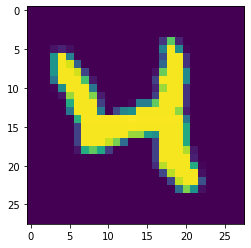

In [6]:
render(20)

In [9]:
import random
def sample(s, e):
    samples = [random.randint(0,1) + x for x in range (s,e)]
    pt = []
    for i in samples:
        pt.append((X_train[i], Y_train[i]))
    return pt

In [10]:
len(sample(0,100))

100

In [11]:
print(sample(10,30)[0][0].reshape(-1, 28**2).shape)
import torch.nn as nn

(1, 784)


In [12]:
class LayNet(nn.Module):
    def __init__(self, x):
        super().__init__()
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128,10)
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

In [13]:
env = LayNet

In [15]:

out = env(sample(0,100)[0][0].reshape(-1,28**2))

In [16]:
print(out)

LayNet(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (act): ReLU()
  (l2): Linear(in_features=128, out_features=10, bias=True)
)


5


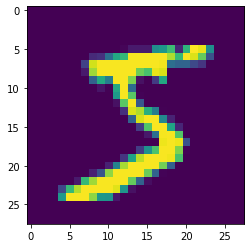

In [53]:
import torch.nn.functional as F
batch = sample(0,300)
for i,l in batch:
    plt.imshow(i)
    print(l)
    break
    

(784,)